# TP1 Machine Learning

## Import APIs

In [38]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

## Exercise 1: download the dataset

In [64]:
wine = pd.read_csv("winequality-red.csv", sep=';')
print(wine.head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


## Exercise 2: Get data information

In [3]:
print (wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


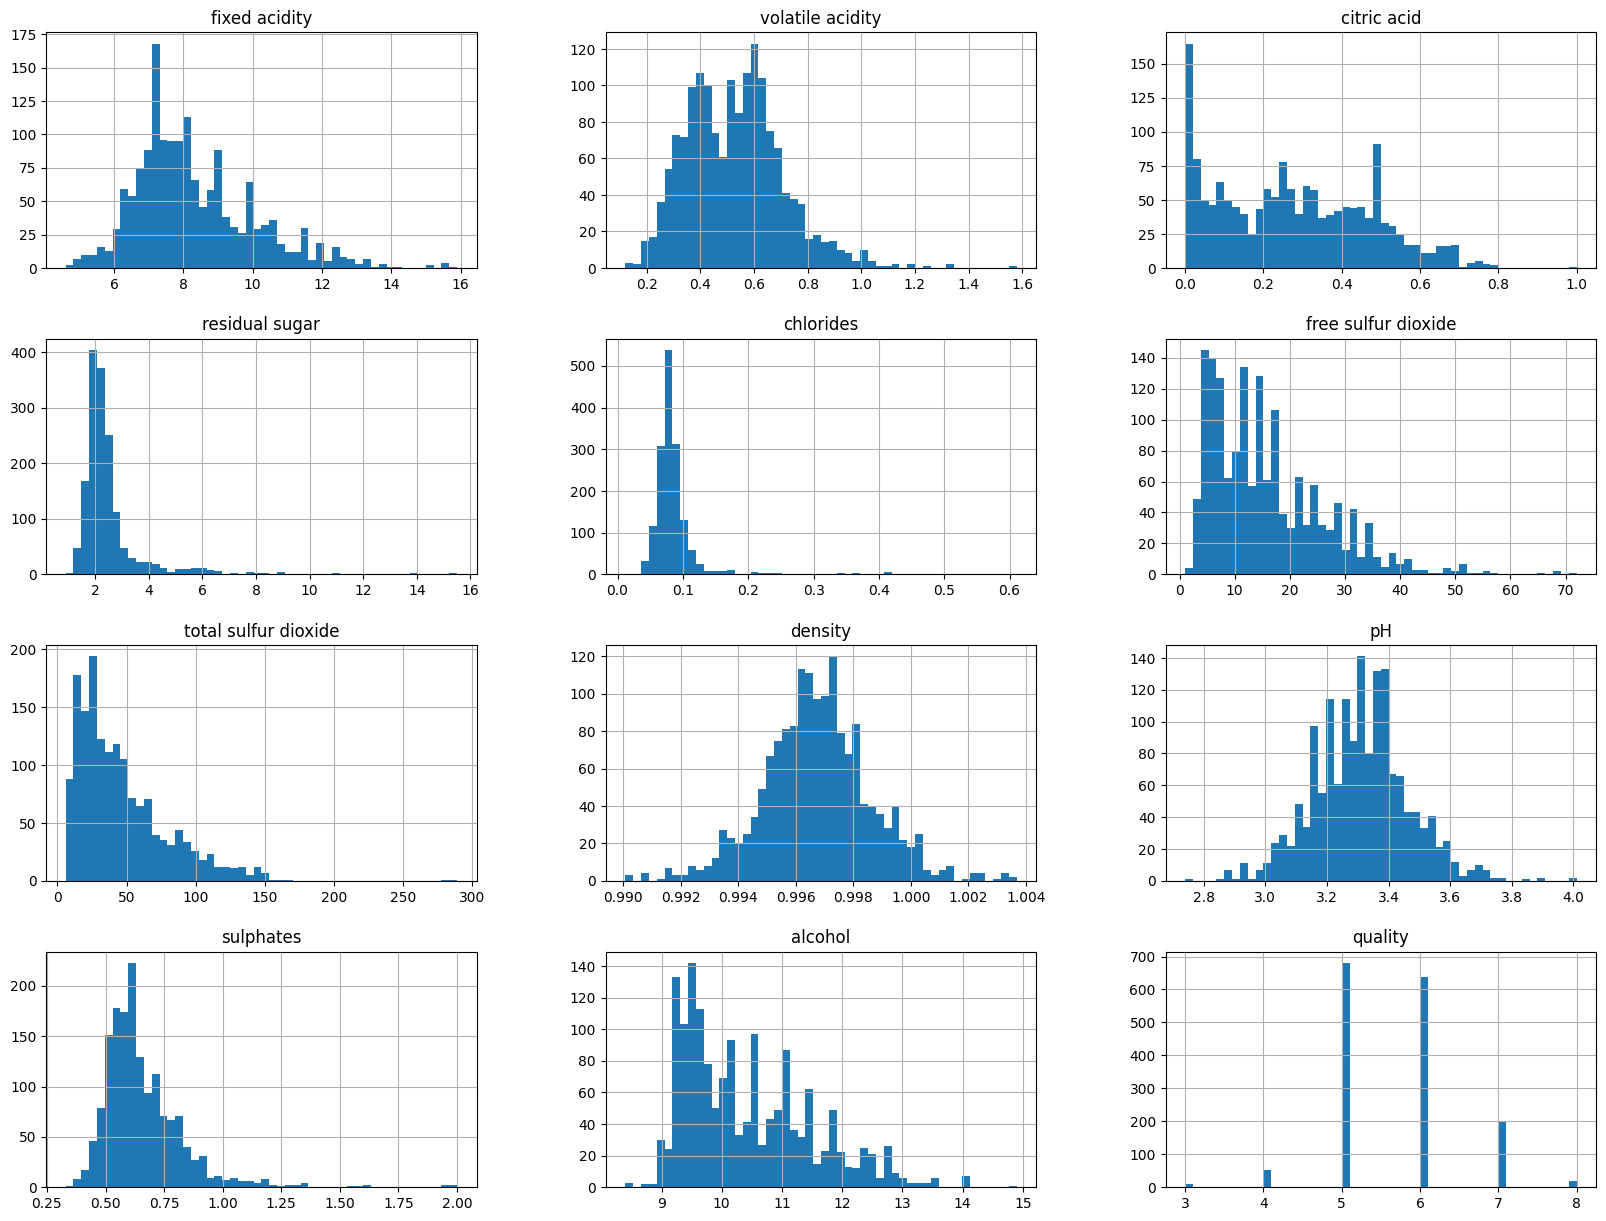

In [5]:
wine.hist(bins=50,figsize=(20,15))
plt.show()

In [6]:
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## Exercise 3: Basic statistical analysis and visualization

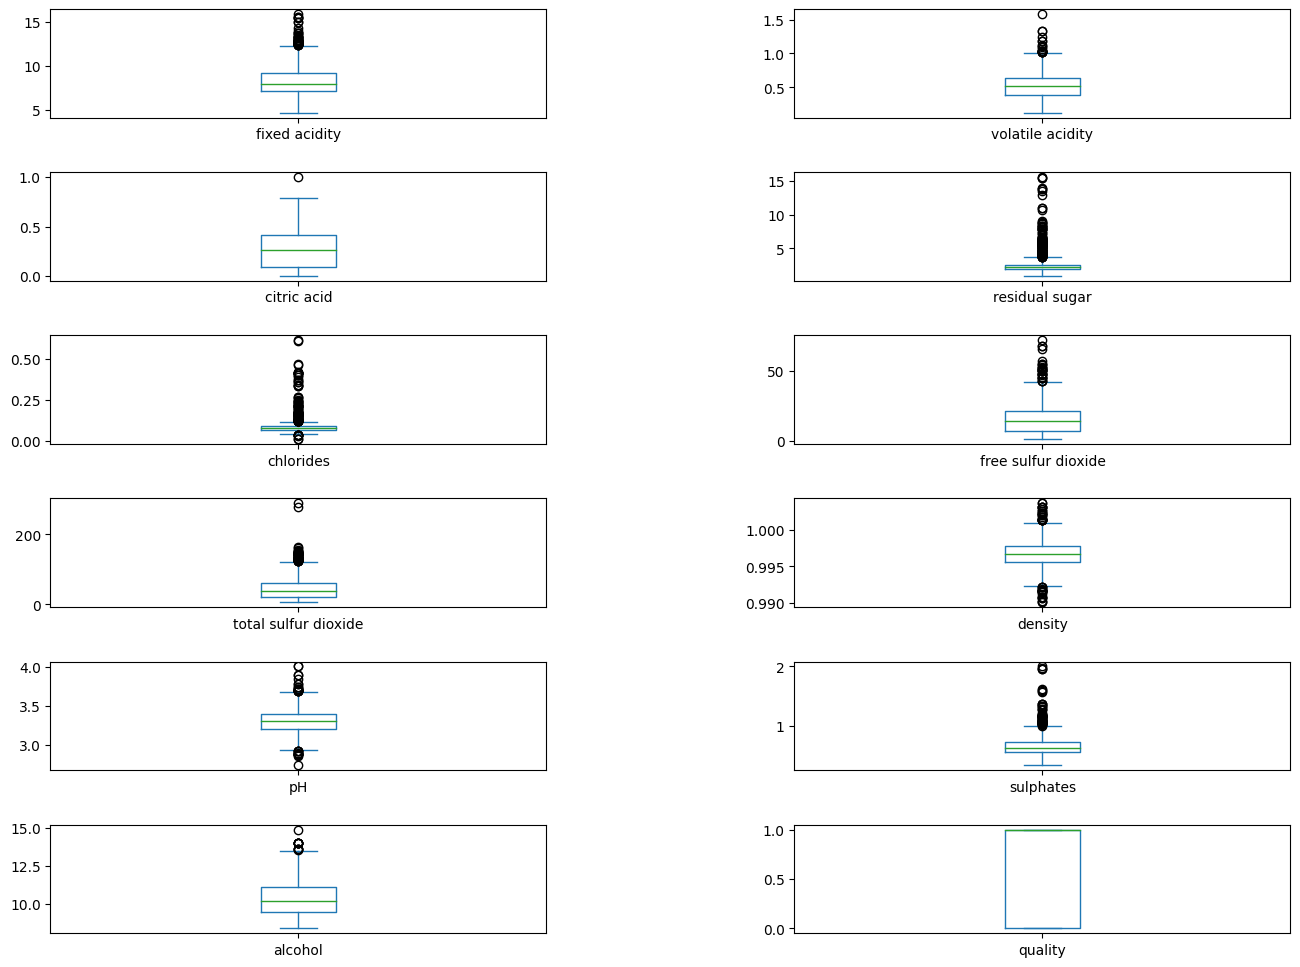

In [43]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
wine.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False,ax=axes)
plt.show()

## Exercise 4: Correlation Matrix Plot

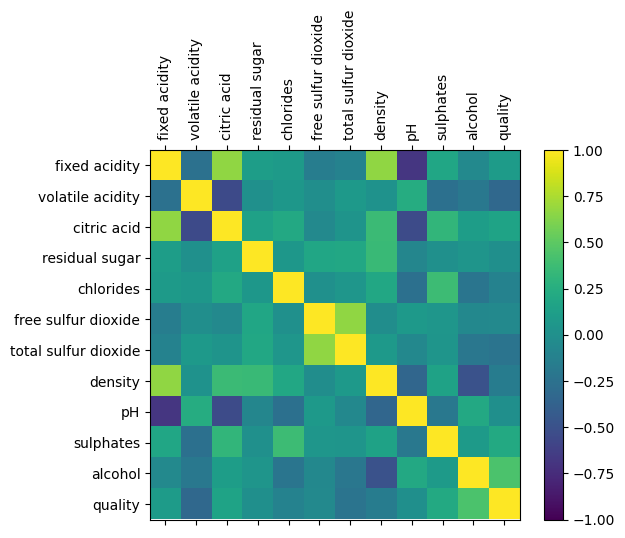

In [24]:
correlations = wine.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
names= wine.head(0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation=90)
ax.set_yticklabels(names)
plt.show()

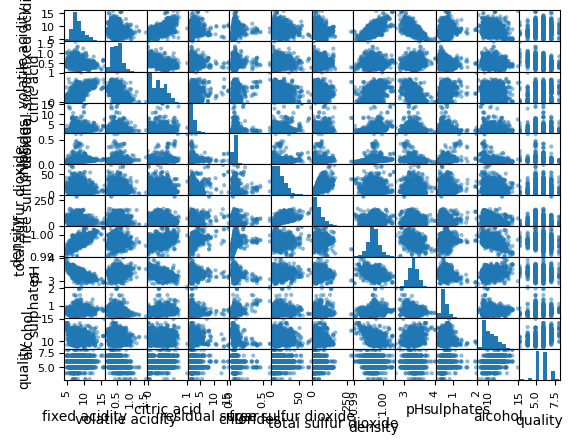

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine)
plt.show()

## Exercice 5: SKlearn Pipeline

### Pipeline creation

In [65]:
ML_pipeline = make_pipeline(StandardScaler(),PCA(n_components=2),RandomForestClassifier(criterion='entropy', n_estimators=10,
max_depth=4, random_state=1))

### Pipeline creation

In [66]:
x=wine.loc[:, 'fixed acidity':'alcohol']
y=wine.loc[:, 'quality']

### Training and test datasets

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1,stratify=y)

### Fitting

In [68]:
ML_pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        n_estimators=10, random_state=1))])

### New data prediction

In [70]:
y_pred = ML_pipeline.predict(x_test)
test_acc = ML_pipeline.score(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
diff=(y_test==y_pred)
diff

Test accuracy: 0.516


1515    False
1413     True
214     False
609      True
1597    False
        ...  
1035    False
771      True
813     False
511     False
166      True
Name: quality, Length: 320, dtype: bool

### Model Storage

In [50]:
joblib.dump(ML_pipeline, 'rf_classifier.pkl')
RFmodel = joblib.load('rf_classifier.pkl') #To load 

## Exercice 6: Data Preprocessing

In [73]:
group_names = ['bad', 'good']
catego = pd.cut(y, bins = 2, labels = group_names)
label_quality = preprocessing.LabelEncoder()
wine['quality'] = label_quality.fit_transform(catego) # Bad becomes 0 and good becomes 1
print(wine['quality'].value_counts())
print(wine['quality'].head(20))

quality
1    855
0    744
Name: count, dtype: int64
0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    1
Name: quality, dtype: int32


### 1. Apply the last pipeline on the transformed data and compare both results

In [74]:
ML_pipeline = make_pipeline(StandardScaler(),PCA(n_components=2),RandomForestClassifier(criterion='entropy', n_estimators=10,
max_depth=4, random_state=1))
x=wine.loc[:, 'fixed acidity':'alcohol']
y=wine.loc[:, 'quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1,stratify=y)
ML_pipeline.fit(x_train, y_train)
y_pred = ML_pipeline.predict(x_test)
test_acc = ML_pipeline.score(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
diff=(y_test==y_pred)
diff

Test accuracy: 0.631


97      False
1081    False
1484    False
1571     True
107      True
        ...  
222     False
525      True
1460    False
899      True
754     False
Name: quality, Length: 320, dtype: bool

### 2. Define a new pipeline without PCA and apply it to the last data with a binary output target variable. Compare again the obtained results

In [75]:
ML_pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(criterion='entropy', n_estimators=10,max_depth=4, random_state=1))
x=wine.loc[:, 'fixed acidity':'alcohol']
y=wine.loc[:, 'quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1,stratify=y)
ML_pipeline.fit(x_train, y_train)
y_pred = ML_pipeline.predict(x_test)
test_acc = ML_pipeline.score(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
diff=(y_test==y_pred)
diff

Test accuracy: 0.734


97       True
1081     True
1484    False
1571     True
107      True
        ...  
222      True
525      True
1460     True
899      True
754     False
Name: quality, Length: 320, dtype: bool